In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime as dt
import pytz, datetime
import scipy.io
import arrow
import os
from IPython.core.display import Image
from salishsea_tools import nc_tools, viz_tools, tidetools, geo_tools,stormtools, bathy_tools
from matplotlib import reload
from __future__ import division
import drifter
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

In [2]:
grid = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc','r')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat']
lons = grid.variables['nav_lon']
bath = grid.variables['Bathymetry']
tracersT = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_10RFdailySmoo/\
SalishSea_1h_20141008_20141010_grid_T.nc')
ssh = tracersT.variables['sossheig']
timesteps = tracersT.variables['time_counter']

In [3]:
drifters = scipy.io.loadmat('/ocean/mhalvers/research/drifters/SoG_drifters.mat',squeeze_me=True)
ubc = drifters['ubc']

In [25]:
def particle_blast_four_senarios(tracks,startdate,i,lon,lat,hour,duration,drifter_one = 'a'):
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    ## plot particles for 4 scenarios
    axs_pa = [axs[0,0],axs[0,1],axs[1,0],axs[1,1]];
    colors=['g','DodgerBlue','DarkViolet']; t = ['-30min','0','30min'];
    keys = ['nowcastseries','RFseries','reduvisseries','1e061e05series']
    titles= ['Baseline','Extended and Deepened River','Lower Viscosity','Lower Both Viscosity and Diffusivity']
    part = 0
    if drifter_one =='a':
        pa = part 
    else:
        pa = part + 27
    for ax, key in zip(axs_pa, keys):
        viz_tools.plot_coastline(ax,grid,coords='map')
        viz_tools.plot_coastline(ax,grid,coords='map',isobath=4)
        ax.set_xlim([-123.6,-123]); ax.set_ylim([48.8,49.4])
        ax.set_xticks([-123.6, -123.4, -123.2,-123])
        ax.set_xticklabels([-123.6, -123.4, -123.2,-123])
        ax.set_xlabel('Longitude'); ax.set_ylabel('Latitude') 
        ## plot
        ax.scatter(lon[key][0,0+pa:9+pa],lat[key][0,0+pa:9+pa],color='k',marker='s',s=10)
        ax.plot(lon[key][1:,1+pa:9+pa],lat[key][1:,1+pa:9+pa],color=colors[0])
        ax.plot(lon[key][1:,10+pa:18+pa],lat[key][1:,10+pa:18+pa],color=colors[1])
        ax.plot(lon[key][1:,19+pa:27+pa],lat[key][1:,19+pa:27+pa],color=colors[2])
        ax.set_title(key)
    ## to fake the legend
        time30minus, = ax.plot(lon[key][1:,0+pa],lat[key][1:,0+pa],color=colors[0])
        time0, =ax.plot(lon[key][1:,9+pa],lat[key][1:,9+pa],color=colors[1])
        time30plus, = ax.plot(lon[key][1:,18+pa],lat[key][1:,18+pa],color=colors[2])
        ax.legend([time30minus, time0, time30plus], ['-30 min', '0 min', '+30min'], loc='best')
    for ax, title in zip(axs_pa, titles):
        ax.set_title(title)

In [20]:
drop = 'drop1/12'
runs=['nowcastseries','RFseries','reduvisseries','1e061e05series','jettyseries']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon112 = {}; lat112={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon112[run] = f.variables['traj_lon']
    lat112[run] = f.variables['traj_lat']

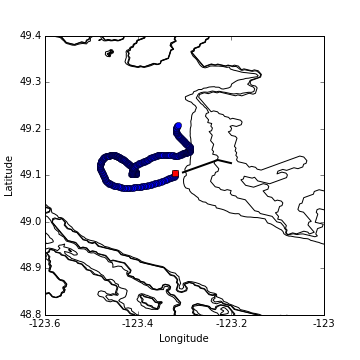

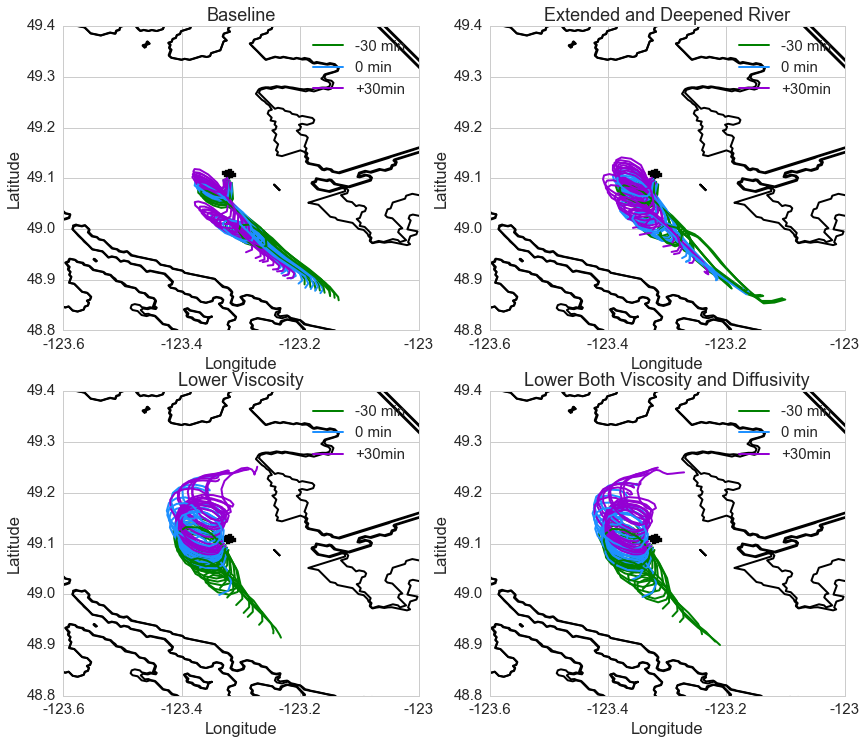

In [21]:
buoy = 2
name, tracks=drifter.organize_info(buoy,ubc)
particle_blast_four_senarios(tracks, dt.datetime(2014,10,8),-1,lon112,lat112,16,29,drifter_one = 'a')
Image(filename='/ocean/jieliu/research/meopar/surface current/drop112a.png')

In [78]:
def test_distance(i):
    """To find the distance for each case over the nine positions"""
    fig, ax = plt.subplots(1,1,figsize = (6,5))
    viz_tools.plot_coastline(ax,grid,coords='map')
    viz_tools.plot_coastline(ax,grid,coords='map',isobath=4)
    ax.plot(lon112['reduvisseries'][i,18:27],lat112['reduvisseries'][i,18:27],'.',markersize = 12)
    ax.set_xlim([-123.6,-123]); ax.set_ylim([48.8,49.4])
    ax.set_xticks([-123.6, -123.4, -123.2,-123])
    ax.set_xticklabels([-123.6, -123.4, -123.2,-123])
    ax.set_title(i)

In [52]:
geo_tools.haversine(lon112['nowcastseries'][29,0],lat112['nowcastseries'][29,0],lon112['nowcastseries'][29,8],lat112['nowcastseries'][29,8])

2.3973075222068321

In [56]:
geo_tools.haversine(lon112['nowcastseries'][29,9],lat112['nowcastseries'][29,9],lon112['nowcastseries'][29,17],lat112['nowcastseries'][29,17])

3.4152803951519952

In [61]:
geo_tools.haversine(lon112['nowcastseries'][29,18],lat112['nowcastseries'][29,18],lon112['nowcastseries'][29,26],lat112['nowcastseries'][29,26])

3.6895553066849032

In [55]:
geo_tools.haversine(lon112['RFseries'][29,0],lat112['RFseries'][29,0],lon112['RFseries'][29,8],lat112['RFseries'][29,8])

2.972733536665805

In [58]:
geo_tools.haversine(lon112['RFseries'][29,9],lat112['RFseries'][29,9],lon112['RFseries'][29,17],lat112['RFseries'][29,17])

4.910492303103231

In [62]:
geo_tools.haversine(lon112['RFseries'][29,18],lat112['RFseries'][29,18],lon112['RFseries'][29,26],lat112['RFseries'][29,26])

6.1810073347200793

In [66]:
geo_tools.haversine(lon112['reduvisseries'][29,0],lat112['reduvisseries'][29,0],lon112['reduvisseries'][29,8],lat112['reduvisseries'][29,8])

7.1072286877507143

In [67]:
geo_tools.haversine(lon112['reduvisseries'][29,9],lat112['reduvisseries'][29,9],lon112['reduvisseries'][29,17],lat112['reduvisseries'][29,17])

17.090178007825934

In [68]:
geo_tools.haversine(lon112['reduvisseries'][29,18],lat112['reduvisseries'][29,18],lon112['reduvisseries'][29,26],lat112['reduvisseries'][29,26])

6.570741911222048

In [69]:
geo_tools.haversine(lon112['1e061e05series'][29,0],lat112['1e061e05series'][29,0],lon112['1e061e05series'][29,8],lat112['1e061e05series'][29,8])

8.5985661534235174

In [70]:
geo_tools.haversine(lon112['1e061e05series'][29,9],lat112['1e061e05series'][29,9],lon112['1e061e05series'][29,17],lat112['1e061e05series'][29,17])

16.398648279724434

In [71]:
geo_tools.haversine(lon112['1e061e05series'][29,18],lat112['1e061e05series'][29,18],lon112['1e061e05series'][29,26],lat112['1e061e05series'][29,26])

9.1698768868531264

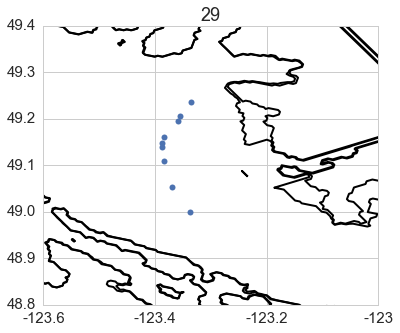

In [77]:
test_distance(29); ## middle time 

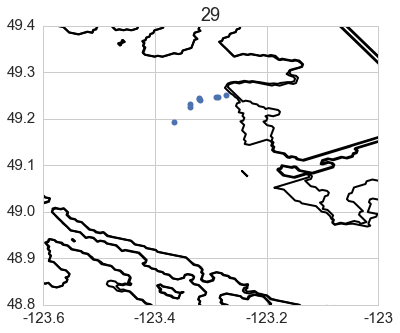

In [79]:
test_distance(29);

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


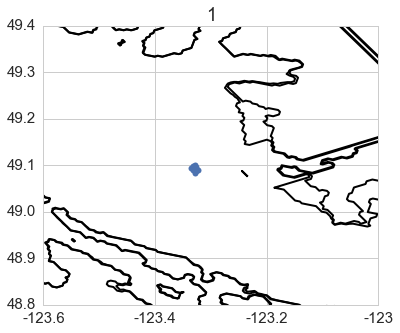

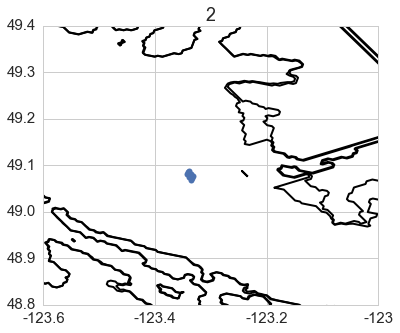

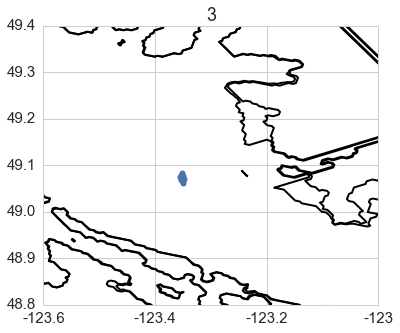

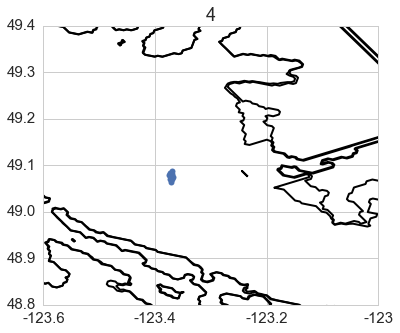

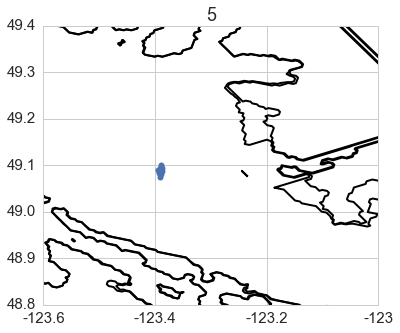

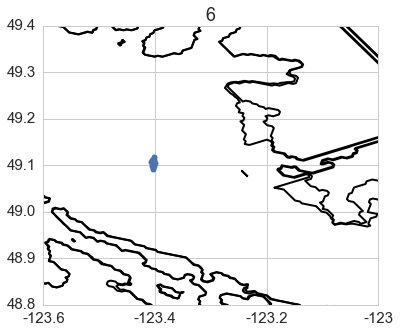

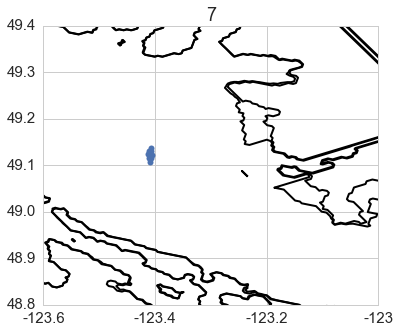

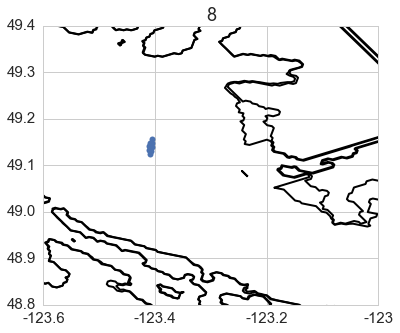

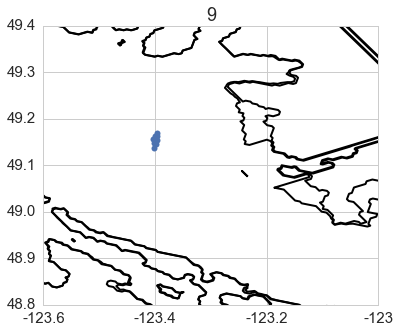

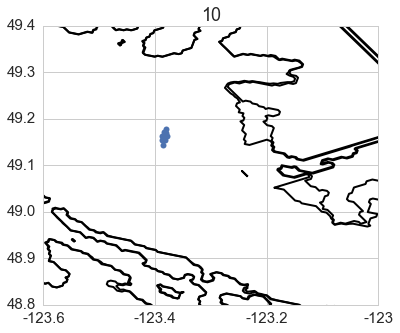

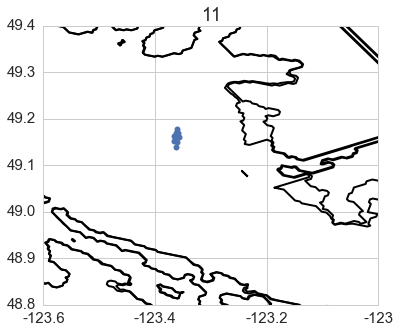

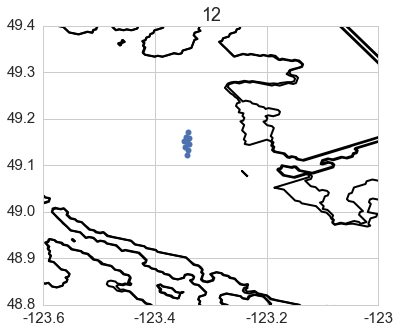

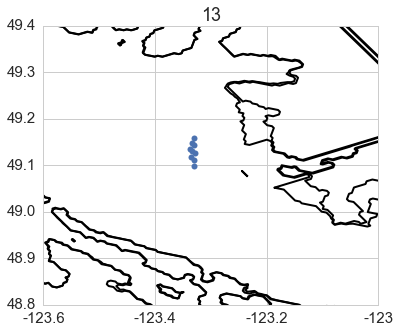

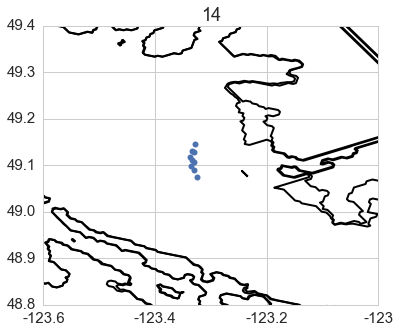

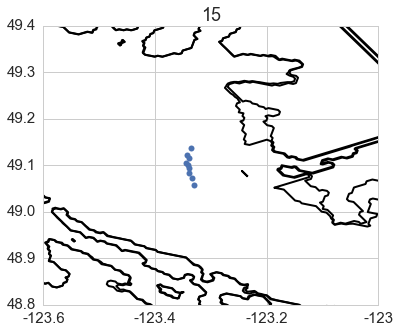

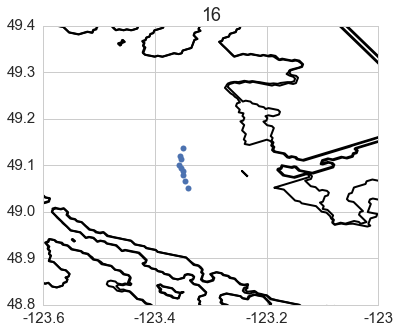

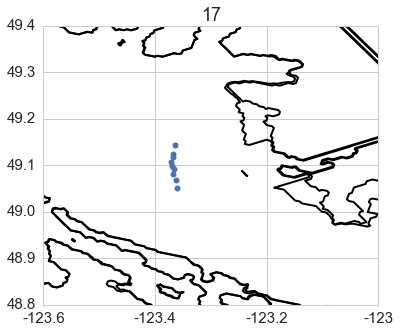

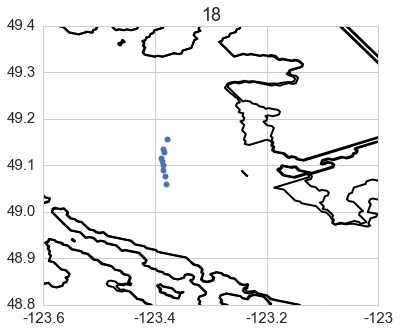

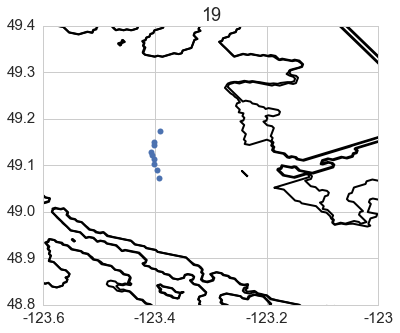

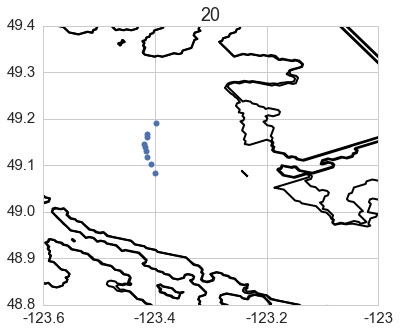

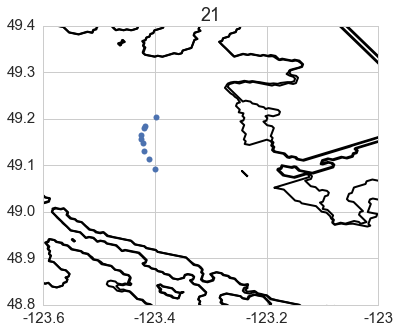

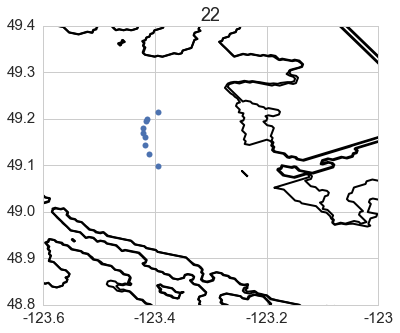

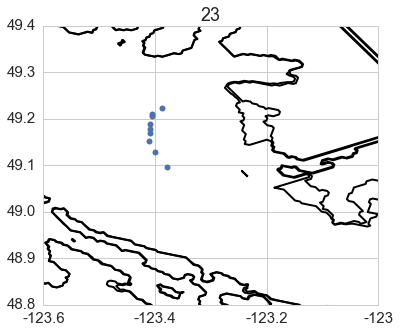

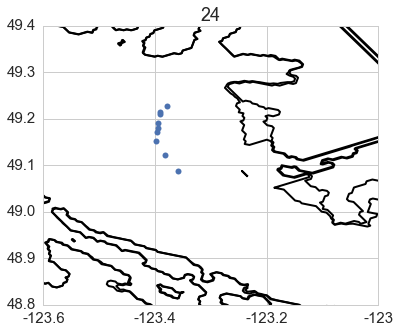

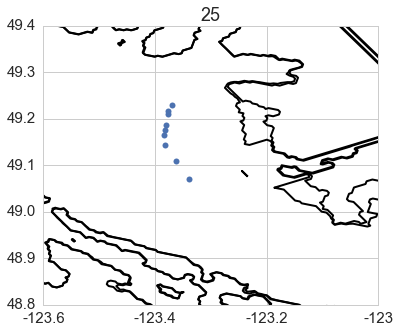

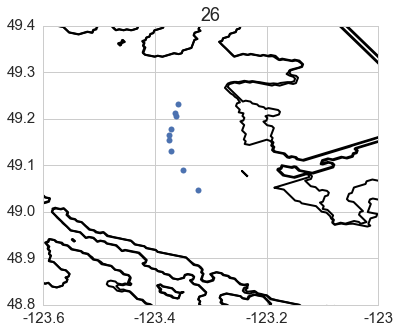

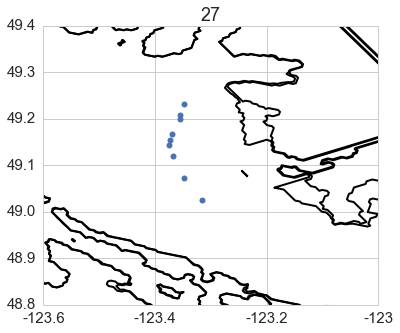

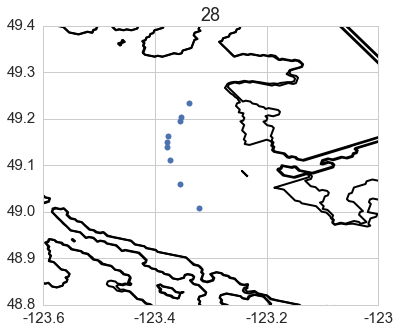

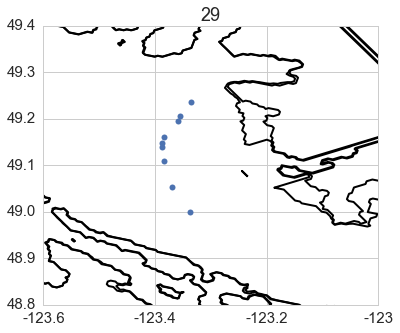

In [76]:
test_distance(1)
test_distance(2)
test_distance(3)
test_distance(4)
test_distance(5)
test_distance(6)
test_distance(7)
test_distance(8)
test_distance(9)
test_distance(10)
test_distance(11)
test_distance(12)
test_distance(13)
test_distance(14)
test_distance(15);test_distance(16);test_distance(17);test_distance(18);test_distance(19);test_distance(20);test_distance(21);
test_distance(22);test_distance(23);test_distance(24);test_distance(25);test_distance(26);test_distance(27);test_distance(28);
test_distance(29);

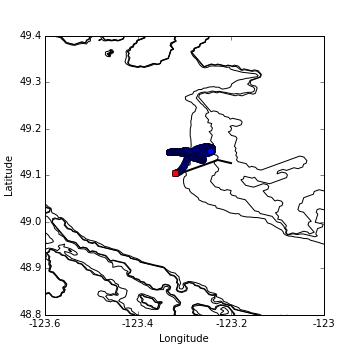

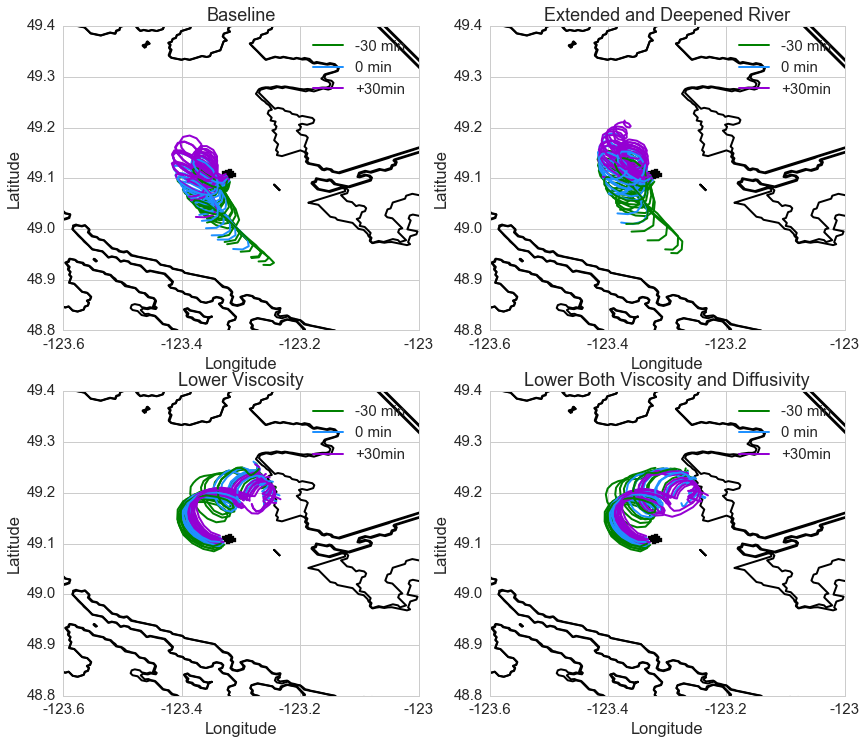

In [7]:
buoy = 3
name, tracks=drifter.organize_info(buoy,ubc)
particle_blast_four_senarios(tracks, dt.datetime(2014,10,8),-1,lon112,lat112,17,29,drifter_one = 'b')
Image(filename='/ocean/jieliu/research/meopar/surface current/drop112b.png')

In [8]:
drop = 'drop1/3'
runs=['nowcastseries','RFseries','reduvisseries','1e061e05series','jettyseries']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon13 = {}; lat13={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon13[run] = f.variables['traj_lon']
    lat13[run] = f.variables['traj_lat']

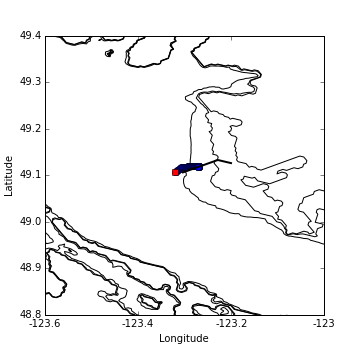

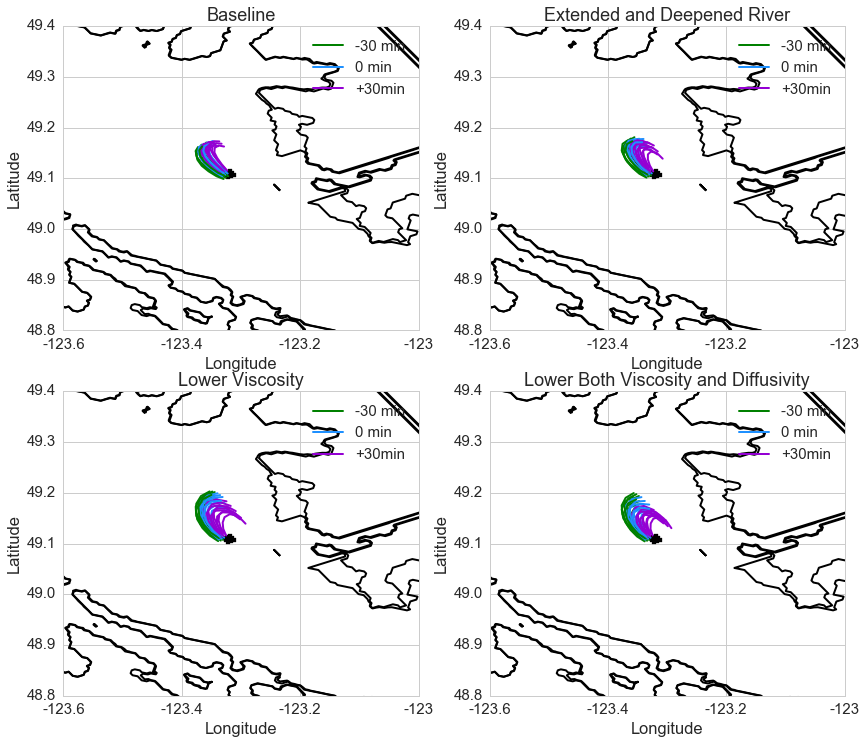

In [9]:
buoy = 9
name, tracks=drifter.organize_info(buoy,ubc)
particle_blast_four_senarios(tracks, dt.datetime(2014,10,8),-1,lon13,lat13,19,7,drifter_one = 'a')
Image(filename='/ocean/jieliu/research/meopar/surface current/drop13.png')

In [10]:
drop = 'drop2/12'
runs=['nowcastseries','RFseries','reduvisseries','1e061e05series','jettyseries']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon212 = {}; lat212={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon212[run] = f.variables['traj_lon']
    lat212[run] = f.variables['traj_lat']

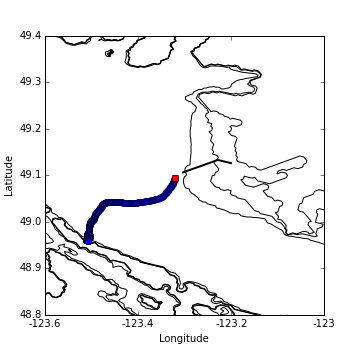

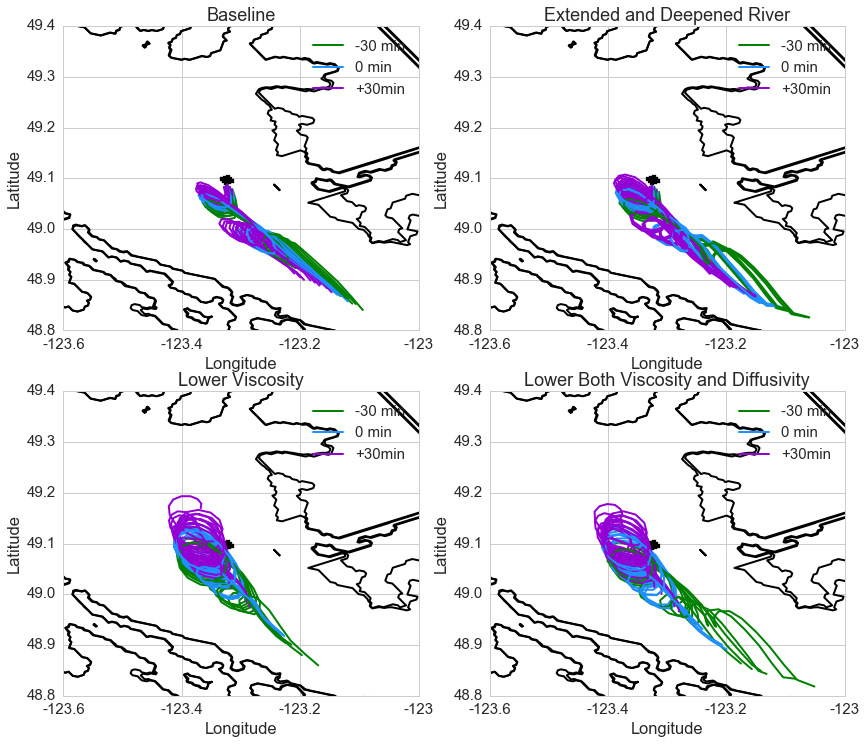

In [11]:
buoy = 1
name, tracks=drifter.organize_info(buoy,ubc)
fig = particle_blast_four_senarios(tracks, dt.datetime(2014,10,8),-1,lon212,lat212,16,27,drifter_one = 'a')
Image(filename='/ocean/jieliu/research/meopar/surface current/drop212a.png')

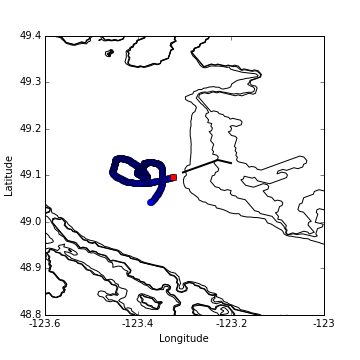

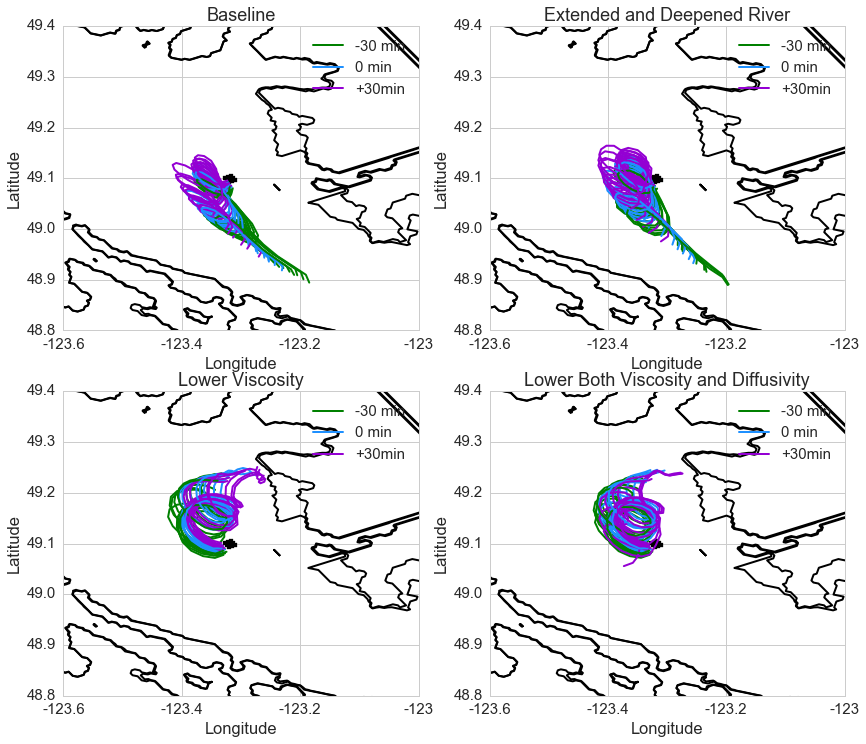

In [12]:
buoy = 4
name, tracks=drifter.organize_info(buoy,ubc)
fig = particle_blast_four_senarios(tracks, dt.datetime(2014,10,8),-1,lon212,lat212,17,27,drifter_one = 'b')
Image(filename='/ocean/jieliu/research/meopar/surface current/drop212b.png')

In [13]:
drop = 'drop2/3'
runs=['nowcastseries','RFseries','reduvisseries','1e061e05series','jettyseries']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon23 = {}; lat23={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon23[run] = f.variables['traj_lon']
    lat23[run] = f.variables['traj_lat']

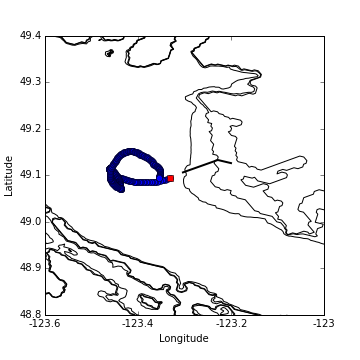

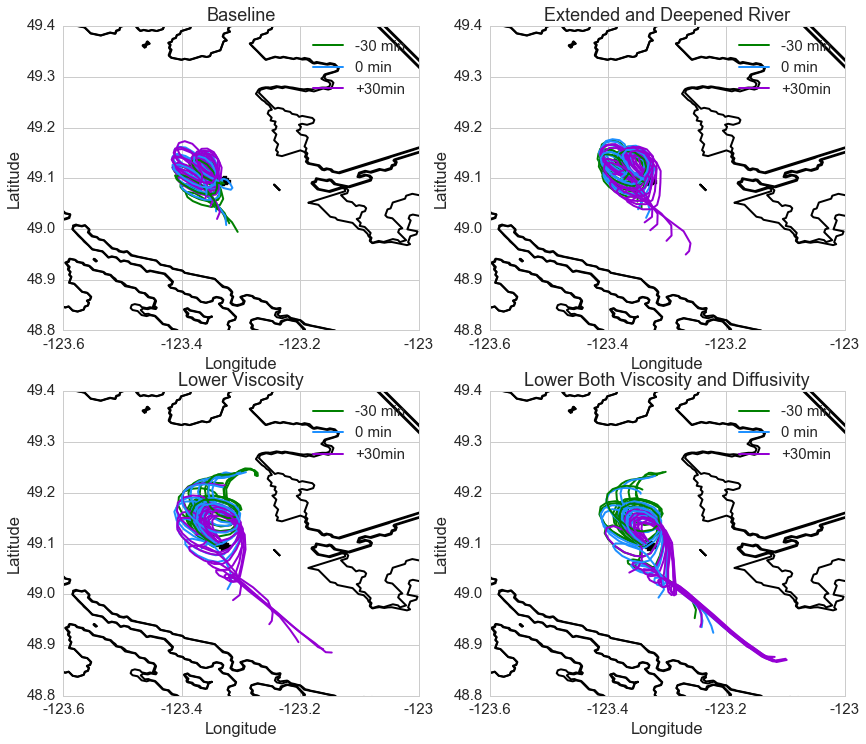

In [14]:
buoy = 7
name, tracks=drifter.organize_info(buoy,ubc)
particle_blast_four_senarios(tracks, dt.datetime(2014,10,8),-1,lon23,lat23,19,24,drifter_one = 'a')
Image(filename='/ocean/jieliu/research/meopar/surface current/drop23.png')

In [15]:
drop = 'drop3/1'
runs=['nowcastseries','RFseries','reduvisseries','1e061e05series','jettyseries']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon31 = {}; lat31={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon31[run] = f.variables['traj_lon']
    lat31[run] = f.variables['traj_lat']

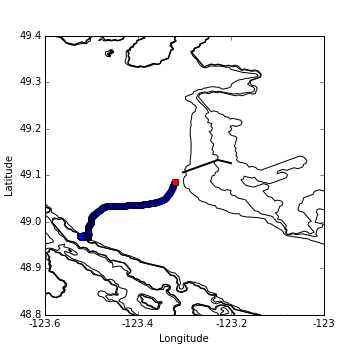

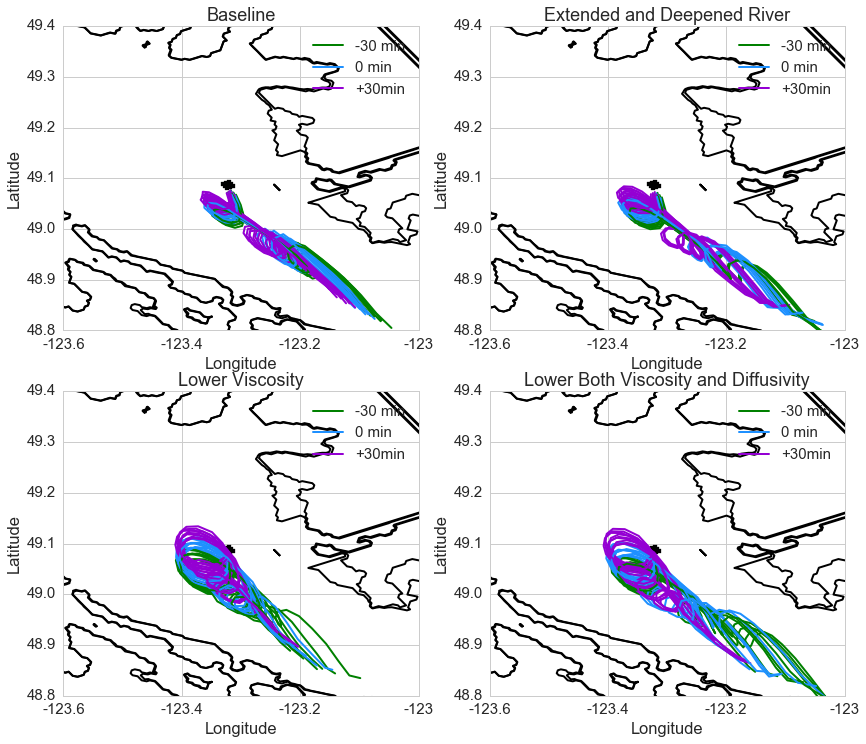

In [16]:
buoy = 0
name, tracks=drifter.organize_info(buoy,ubc)
particle_blast_four_senarios(tracks, dt.datetime(2014,10,8),-1,lon31,lat31,16,27,drifter_one = 'a')
Image(filename='/ocean/jieliu/research/meopar/surface current/drop31.png')

In [17]:
drop = 'drop3/23'
runs=['nowcastseries','RFseries','reduvisseries','1e061e05series','jettyseries']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon323 = {}; lat323={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon323[run] = f.variables['traj_lon']
    lat323[run] = f.variables['traj_lat']

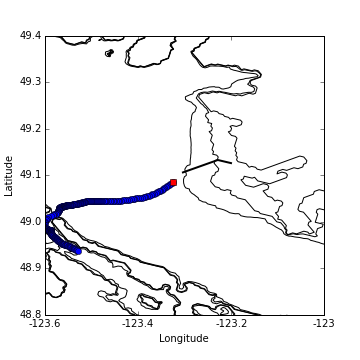

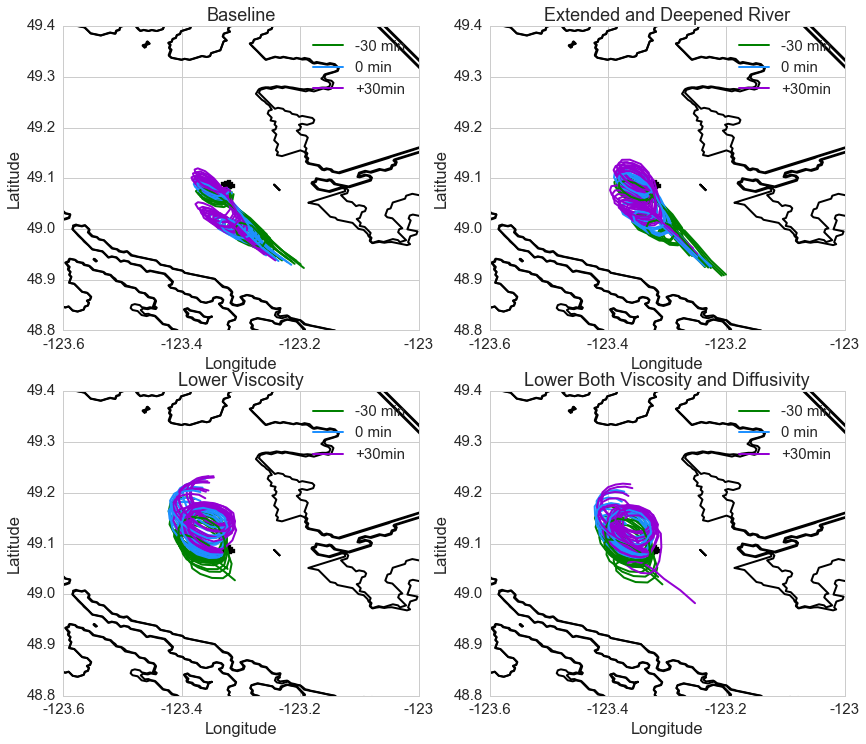

In [18]:
buoy = 5
name, tracks=drifter.organize_info(buoy,ubc)
particle_blast_four_senarios(tracks, dt.datetime(2014,10,8),-1,lon323,lat323,17,24,drifter_one = 'a')
Image(filename='/ocean/jieliu/research/meopar/surface current/drop323a.png')

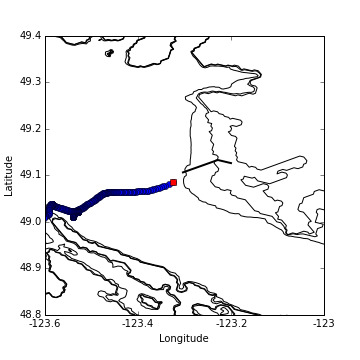

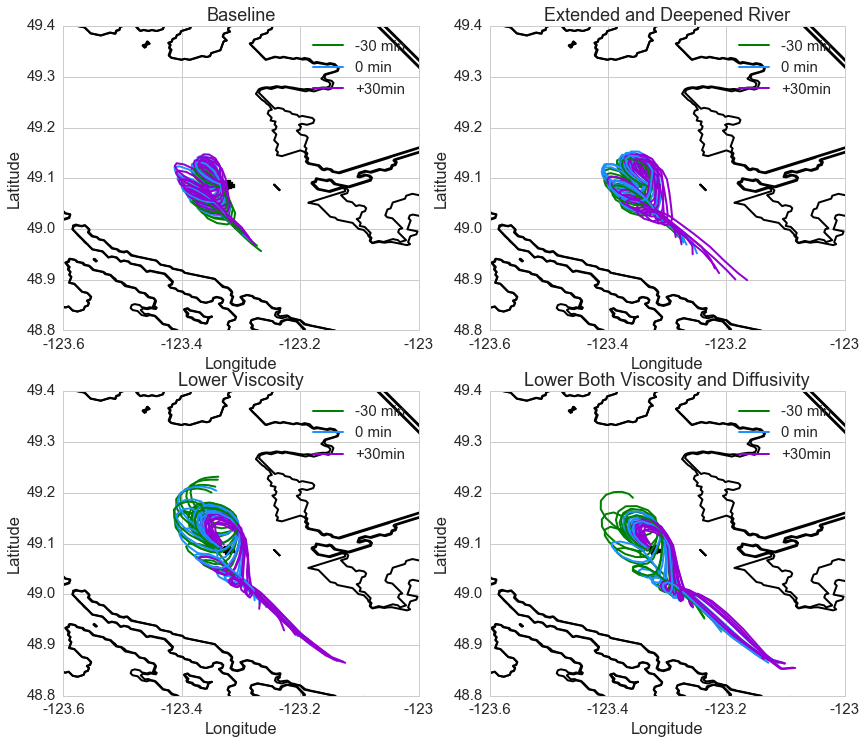

In [19]:
buoy = 6
name, tracks=drifter.organize_info(buoy,ubc)
particle_blast_four_senarios(tracks, dt.datetime(2014,10,8),-1,lon323,lat323,19,24,drifter_one = 'b')
Image(filename='/ocean/jieliu/research/meopar/surface current/drop323b.png')